In [1]:
df  <- read.csv('College_Data')

In [2]:
head(df)

X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [3]:
sapply(df,function(x){sum(is.na(x))})

X     Private        Apps      Accept      Enroll   Top10perc 
          0           0           0           0           0           0 
  Top25perc F.Undergrad P.Undergrad    Outstate  Room.Board       Books 
          0           0           0           0           0           0 
   Personal         PhD    Terminal   S.F.Ratio perc.alumni      Expend 
          0           0           0           0           0           0 
  Grad.Rate 
          0

In [4]:
library('ggplot2')

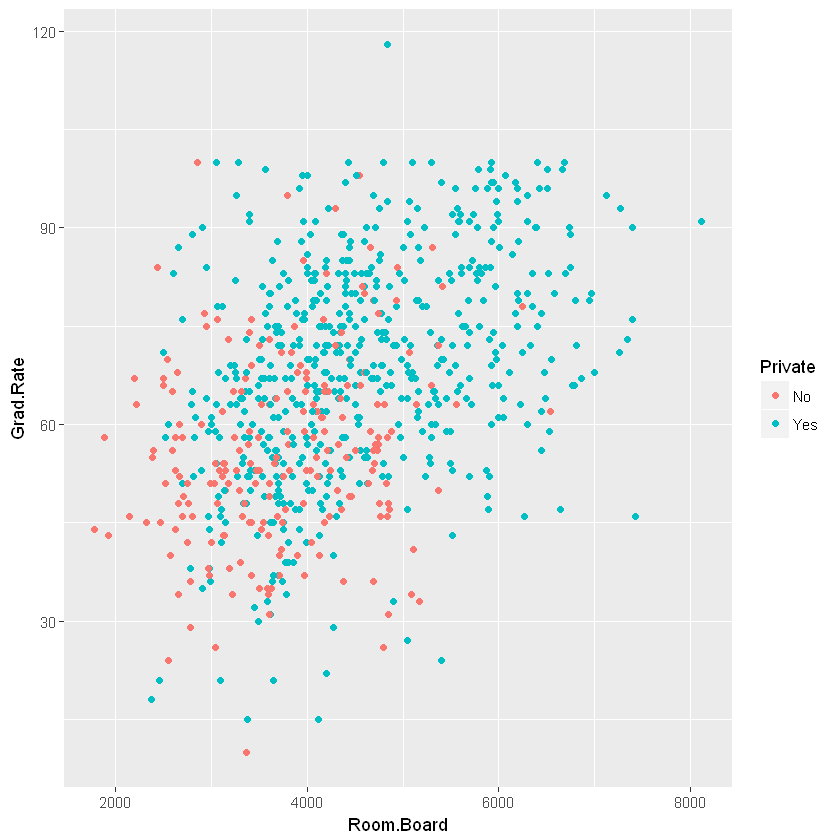

In [5]:
pl <- ggplot(data=df,aes(x = Room.Board,y=Grad.Rate)) 
pl + geom_point(aes(color=Private))

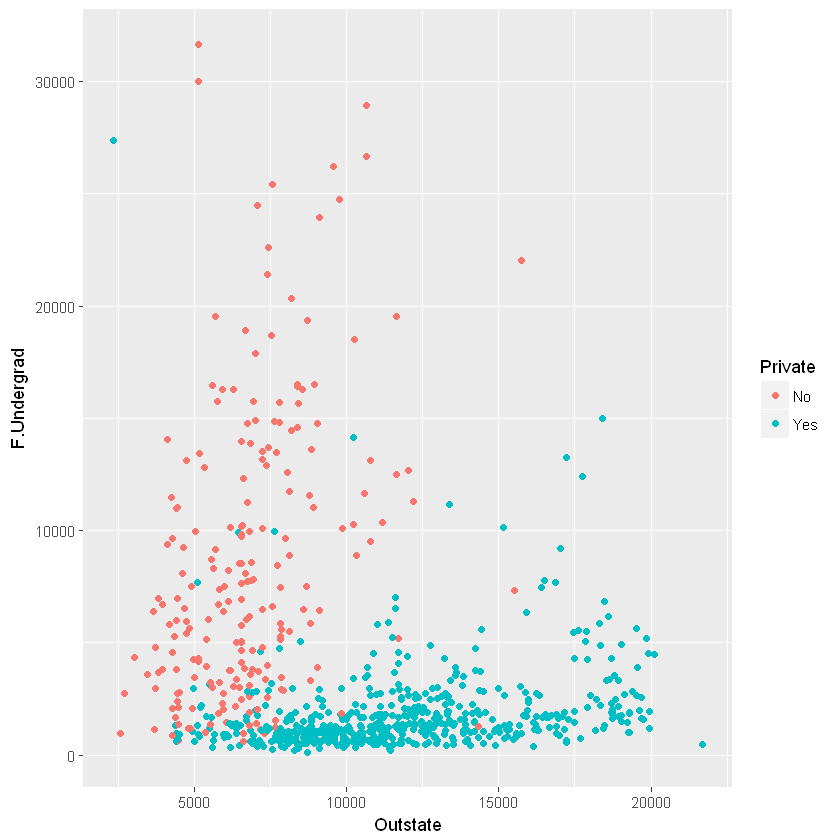

In [6]:
pl <- ggplot(data=df,aes(x = Outstate,y=F.Undergrad)) 
pl + geom_point(aes(color=Private))

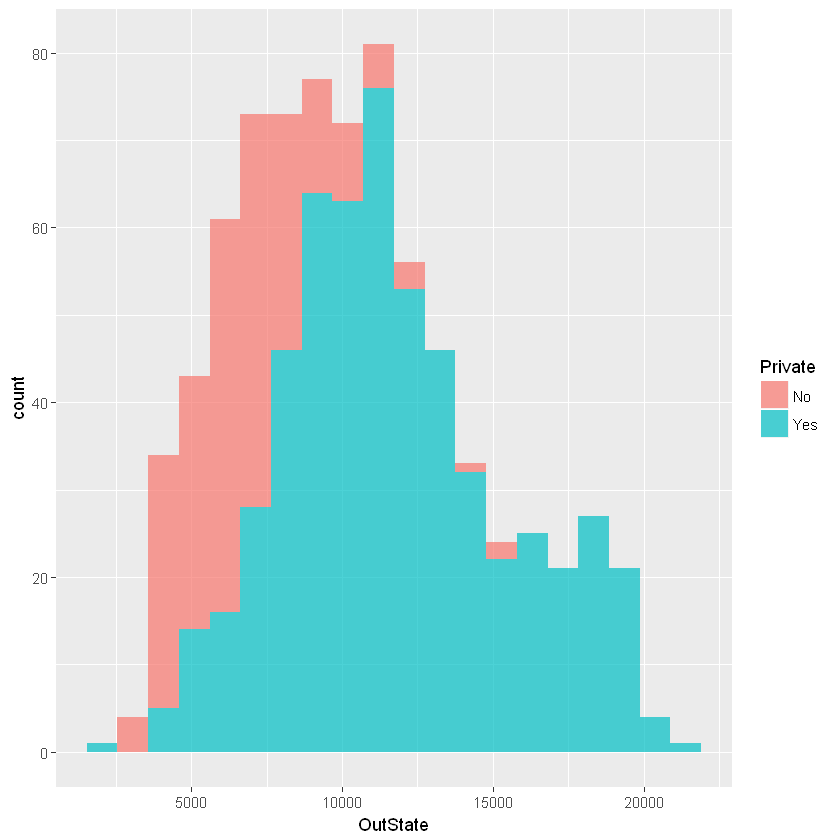

In [7]:
# Adding Labels
pl <- ggplot(df,aes(x=Outstate))
pl + geom_histogram(bins=20,alpha=0.7,aes(fill=Private)) + xlab('OutState')

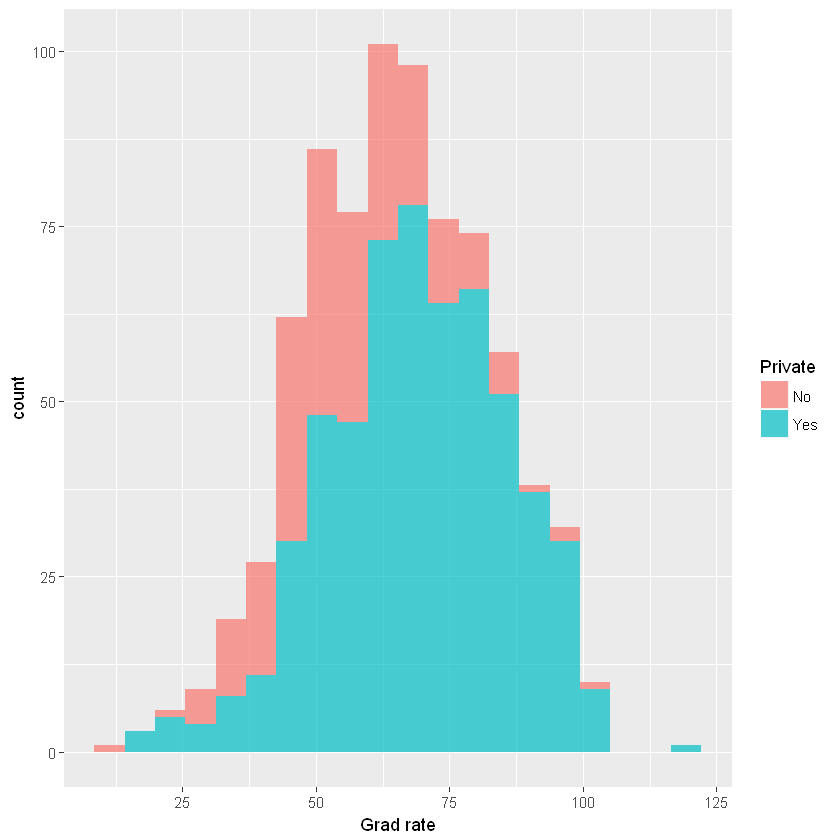

In [8]:
# Adding Labels
pl <- ggplot(df,aes(x=Grad.Rate))
pl + geom_histogram(bins=20,alpha=0.7,aes(fill=Private)) + xlab('Grad rate')

In [9]:
df[df['Grad.Rate'] > 100,]

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
96,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
df[96,'Grad.Rate'] <-100

In [11]:
k <-kmeans(df[,-c(1,2)], centers=5) #Create 5 clusters

In [12]:
k$centers #Display&nbsp;cluster centers
table(k$cluster) #Give a count of data points in each cluster

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
1,9341.750,3606.2500,1321.9500,76.05000,91.70000,5283.200,427.2000,18119.750,6042.750,576.6000,1255.550,93.30000,96.80000,6.61500,35.35000,32347.900,88.95000
2,4940.298,3355.7807,1508.0877,21.32456,52.10526,7888.447,2108.5351,6642.535,3682.754,550.9386,1700.465,76.56140,83.15789,17.51754,13.76316,6987.711,55.23684
3,13042.308,8934.0769,3418.9231,34.76923,67.21154,17770.808,3231.3462,8821.327,4371.192,597.0577,1831.192,85.51923,90.57692,16.01346,17.17308,10354.808,63.67308
4,1137.905,866.7628,338.9233,21.47442,48.80233,1423.879,469.6884,9299.144,4116.807,530.8884,1300.265,65.13488,72.73721,14.29419,21.46047,7698.109,63.04419
5,2576.056,1718.3043,522.7143,39.86957,68.94410,2071.621,283.5652,15747.919,5264.472,578.8882,1045.832,83.27950,90.22360,11.42360,32.76398,13750.056,76.71429



  1   2   3   4   5 
 20 114  52 430 161 

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning mess

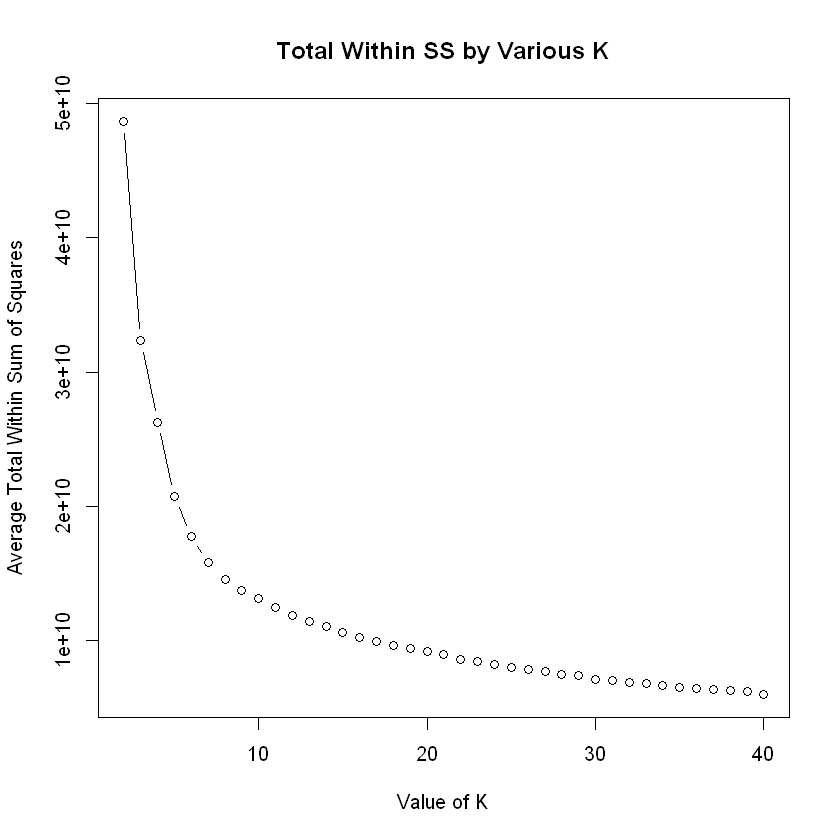

In [13]:
rng<-2:40 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
 k.temp <-kmeans(df[,-c(1,2)],centers=v) #Run kmeans
 v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")